In [ ]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"Attrition data.csv")
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
data.shape

(4410, 29)

In [ ]:
data.Attrition.value_counts()

Attrition
No     3699
Yes     711
Name: count, dtype: int64

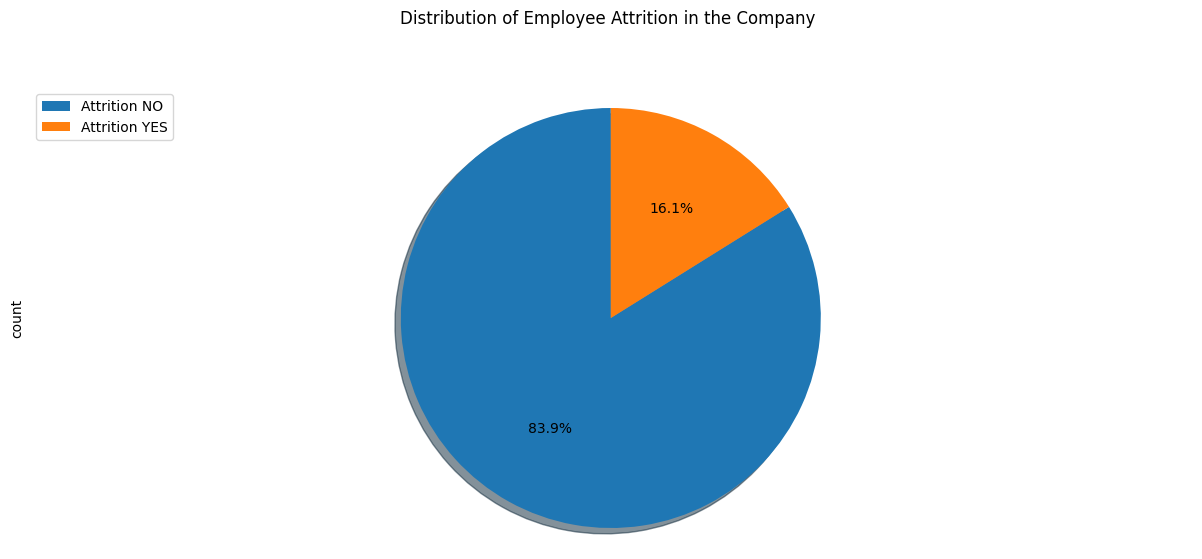

In [ ]:
labels = 'Attrition NO','Attrition YES'
data['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,
                            )

plt.title('Distribution of Employee Attrition in the Company ', y=1.12)
plt.axis('equal')
# add legend
plt.legend(labels=labels, loc='upper left')
 # show plot
plt.show()

In [ ]:
data.drop(columns=['StandardHours','EmployeeCount','Over18','StockOptionLevel'],inplace=True)
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
data.shape

(4410, 25)

In [ ]:
data['JobSatisfaction'].value_counts()

JobSatisfaction
4.0    1367
3.0    1323
1.0     860
2.0     840
Name: count, dtype: int64

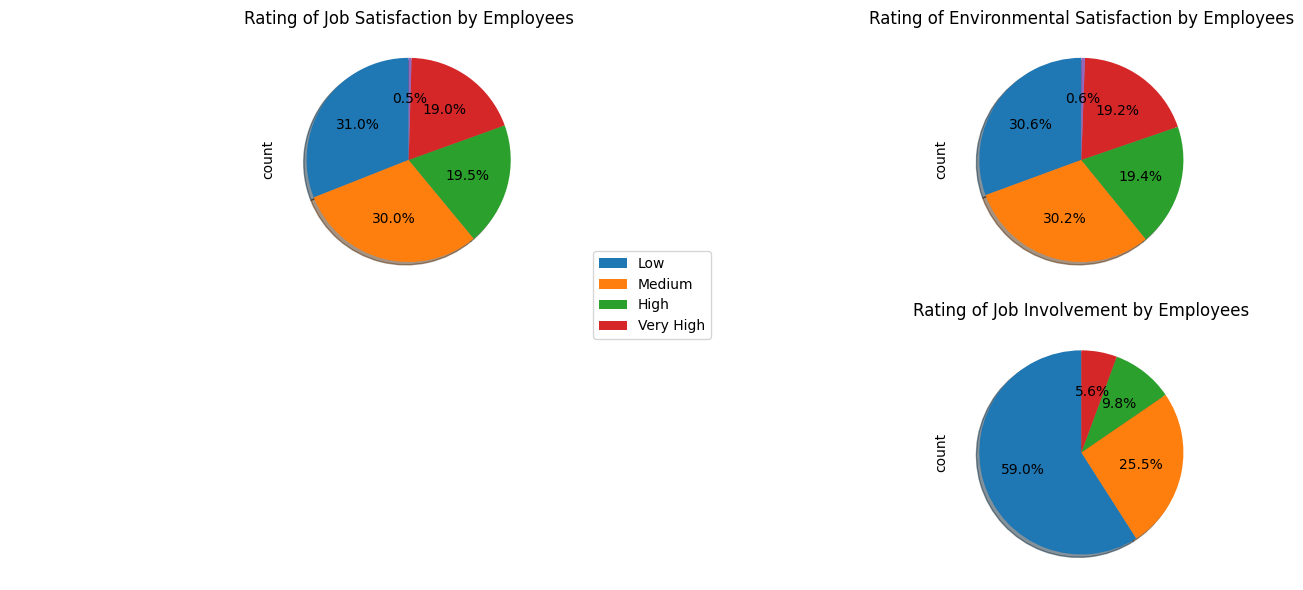

In [ ]:
fig = plt.figure()

# Create subplots
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# Define labels
labels = ['Low', 'Medium', 'High', 'Very High']

# Plot Job Satisfaction
data['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,ax=ax1)
ax1.set_title('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels, loc='center')

# Plot Environment Satisfaction
data['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,ax=ax2)
ax2.set_title('Rating of Environmental Satisfaction by Employees')

# Assuming RelationshipSatisfaction is present, plot it
if 'RelationshipSatisfaction' in data.columns:
    data['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%',
                                startangle=90,
                                shadow=True,
                                labels=None,ax=ax3)
    ax3.set_title('Rating of Relationship Satisfaction by Employees')
else:
    ax3.axis('off')  # Hide the subplot if the column does not exist

# Plot Job Involvement
data['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,ax=ax4)
ax4.set_title('Rating of Job Involvement by Employees')

plt.tight_layout()
plt.show()


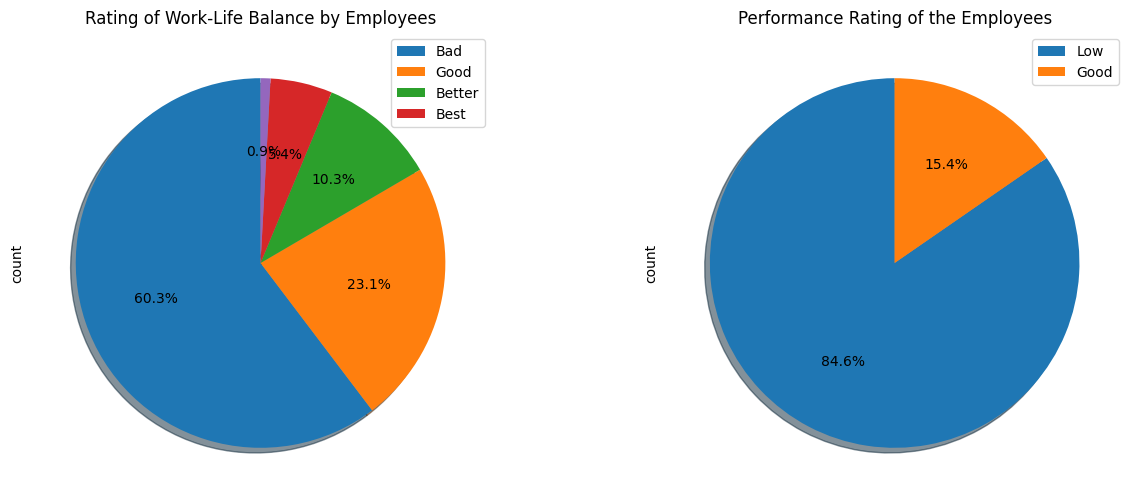

In [ ]:
fig2 = plt.figure()

ax5 = fig2.add_subplot(121)
ax6 = fig2.add_subplot(122)

labels_list1 = 'Bad','Good','Better','Best'
labels_list2 = 'Low','Good','Excellent','Outstanding'

data['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,ax=ax5) # add to subplot 2
ax5.set_title ('Rating of Work-Life Balance by Employees')
ax5.legend(labels=labels_list1,loc='upper right')

data['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,ax=ax6)
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')

plt.show()

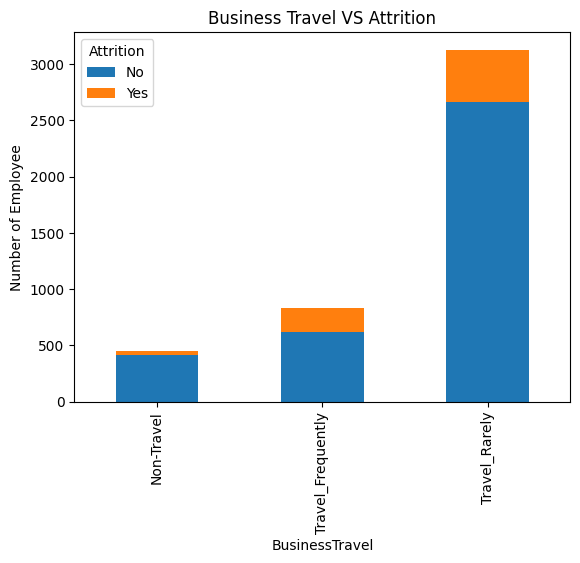

In [ ]:
props = data.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()

props.plot(kind='bar', alpha=1, stacked='False')

plt.title('Business Travel VS Attrition')
plt.ylabel('Number of Employee')
plt.show()

In [ ]:
we = data[['YearsAtCompany', 'YearsSinceLastPromotion',
           'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]

# Display the first few rows of the selected data
print(we.head())

   YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  TotalWorkingYears Attrition
0               1                        0                     0                1.0        No
1               5                        1                     4                6.0       Yes
2               5                        0                     3                5.0        No
3               8                        7                     5               13.0        No
4               6                        0                     4                9.0        No


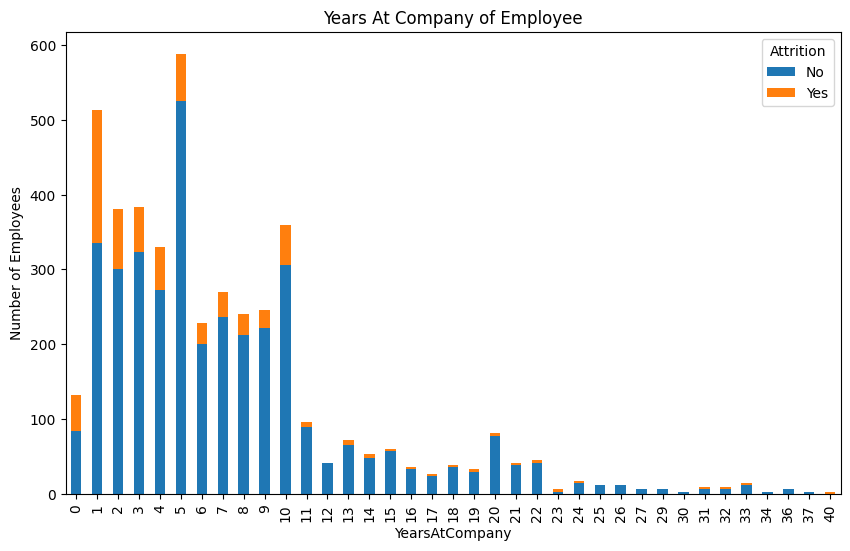

In [ ]:
yac = data.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()

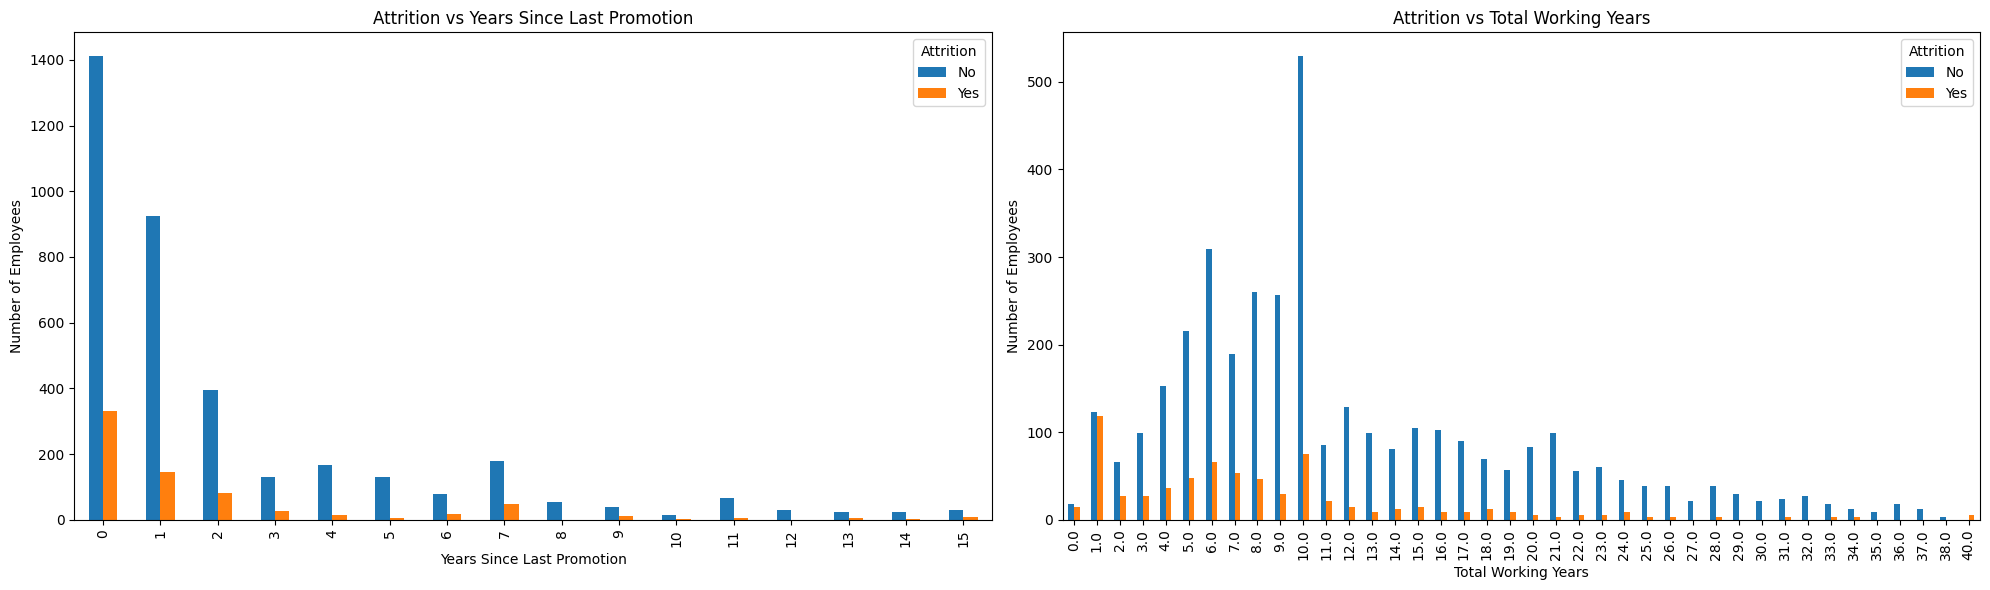

In [ ]:
ysp = data.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()

ytwy = data.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 6))

ysp.plot(kind='bar', stacked=False, ax=ax0)
ax0.set_title('Attrition vs Years Since Last Promotion')
ax0.set_xlabel('Years Since Last Promotion')
ax0.set_ylabel('Number of Employees')

ytwy.plot(kind='bar', stacked=False, ax=ax1)
ax1.set_title('Attrition vs Total Working Years')
ax1.set_xlabel('Total Working Years')
ax1.set_ylabel('Number of Employees')

plt.tight_layout()
plt.show()

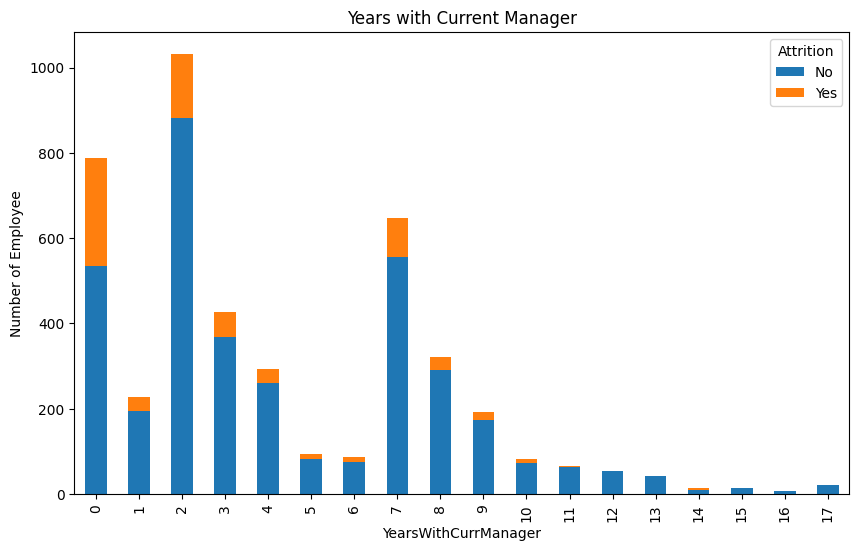

In [ ]:
ycm = data.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()

ycm.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years with Current Manager')
plt.ylabel('Number of Employee')
plt.show()

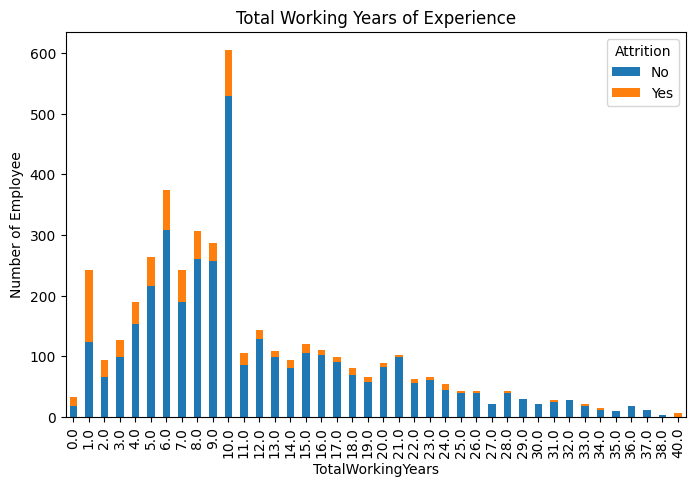

In [ ]:
twy = data.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()

twy.plot(kind='bar', stacked='False',figsize=(8,5))

plt.title('Total Working Years of Experience')
plt.ylabel('Number of Employee')
plt.show()

In [ ]:
mi = data[data['Attrition']=='Yes']['MonthlyIncome']
mi = mi.reset_index()
mi.drop(['index'], axis=1, inplace=True)


mn = data[data['Attrition']=='No']['MonthlyIncome']
mn = mn.reset_index()
mn.drop(['index'], axis=1, inplace=True)

mi['mn'] = mn
mi.rename(columns={'MonthlyIncome':'Yes', 'mn':'No'}, inplace=True)
mi.head()

,Yes,No
0,41890,131160
1,58130,193280
2,57620,83210
3,103330,23420
4,68540,40710


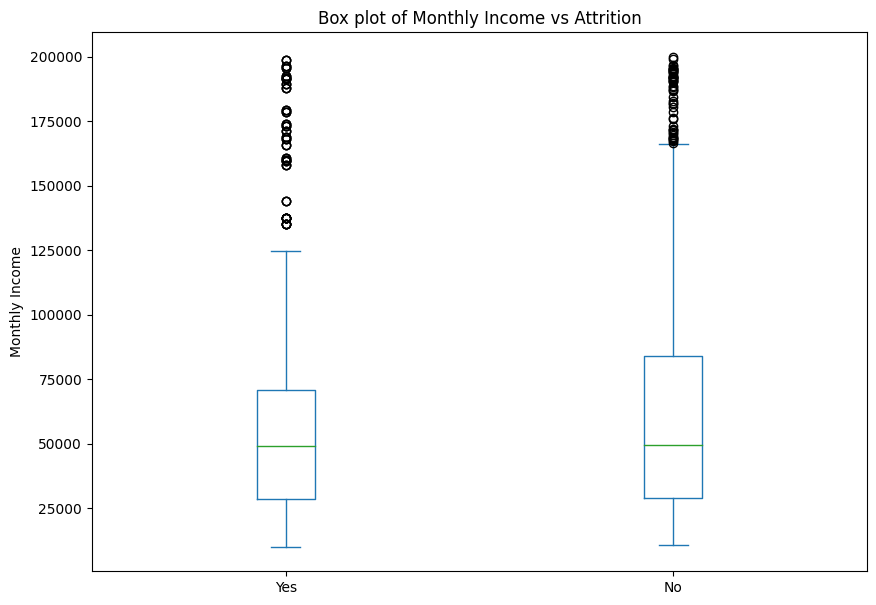

In [ ]:
mi.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')

plt.show()

In [ ]:
dpt = data[['Department','Attrition']]
dpt.head()

,Department,Attrition
0,Sales,No
1,Research & Development,Yes
2,Research & Development,No
3,Research & Development,No
4,Research & Development,No


In [ ]:
dpt['Department'].value_counts()

Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64

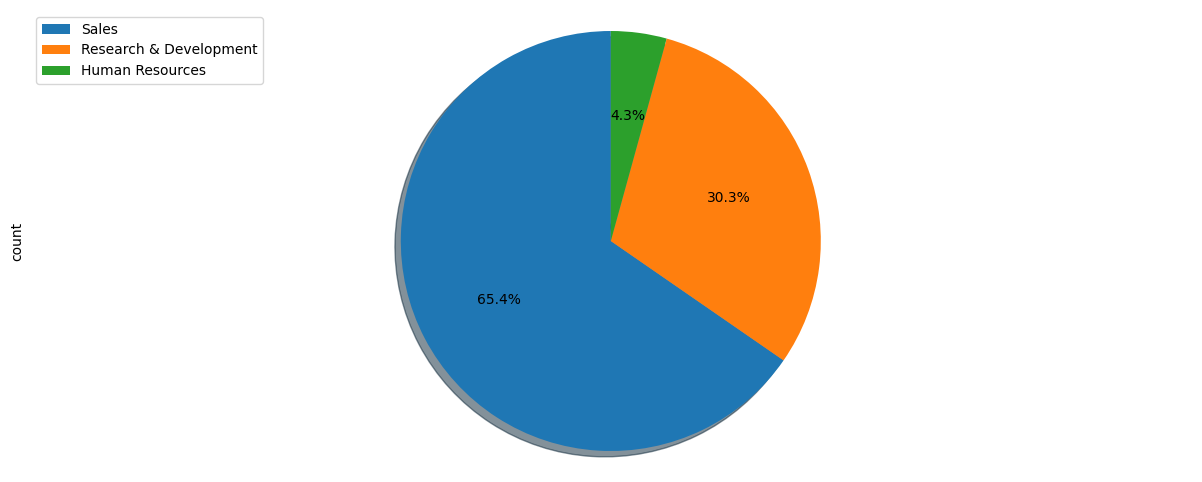

In [ ]:
dpt['Department'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None)
plt.axis('equal')
plt.legend(labels=dpt['Department'].unique(), loc='upper left')

In [ ]:
dpm = data.groupby("Department")['Attrition'].value_counts(normalize=False).unstack()
dpm = dpm.transpose()
dpm

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,132,2430,1137
Yes,57,453,201


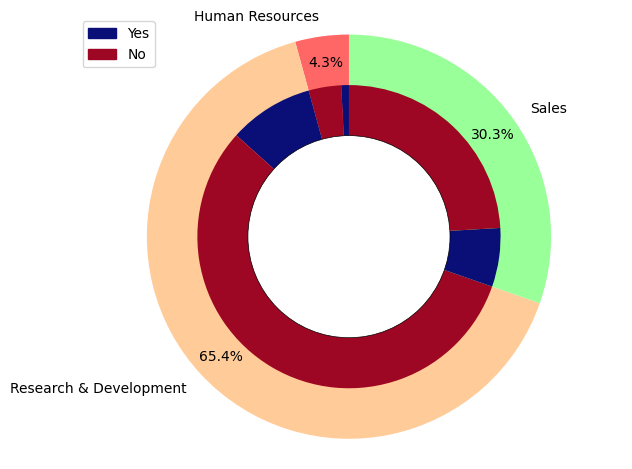

In [ ]:
labels = ['Human Resources', 'Research & Development', 'Sales',]
sizes = [63, 961, 446]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']

# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
gda = data[['Gender', 'DistanceFromHome', 'Attrition']]
gda.head()

,Gender,DistanceFromHome,Attrition
0,Female,6,No
1,Female,10,Yes
2,Male,17,No
3,Male,2,No
4,Male,10,No


In [ ]:
gda['Gender'].value_counts()

Gender
Male      2646
Female    1764
Name: count, dtype: int64

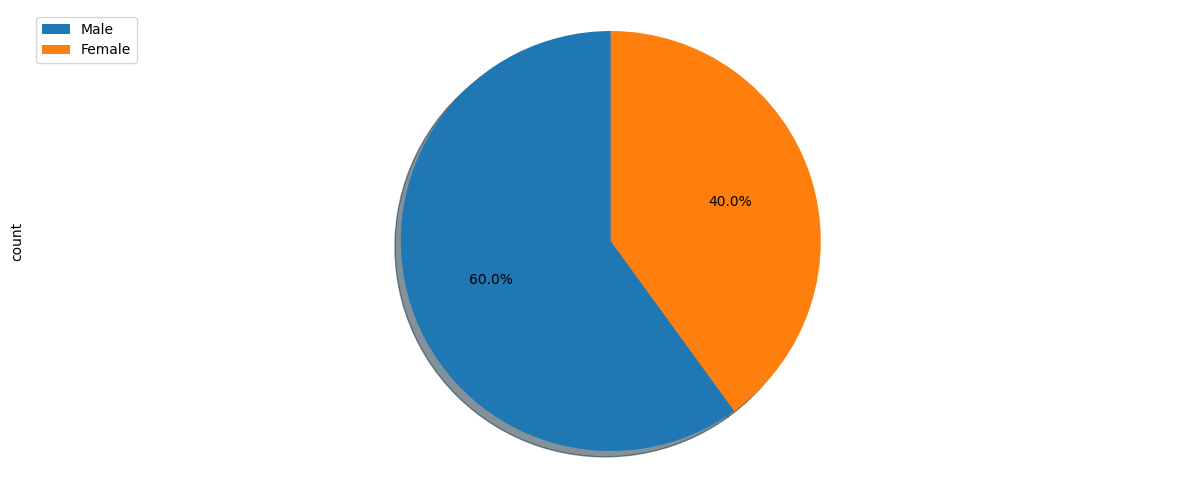

In [ ]:
gda['Gender'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None)
plt.axis('equal')
plt.legend(labels=['Male', 'Female'], loc='upper left')

In [ ]:
fma = gda.groupby("Gender")['Attrition'].value_counts(normalize=False).unstack()
fma = fma.transpose()
fma

Gender,Female,Male
Attrition,,
No,1494,2205
Yes,270,441


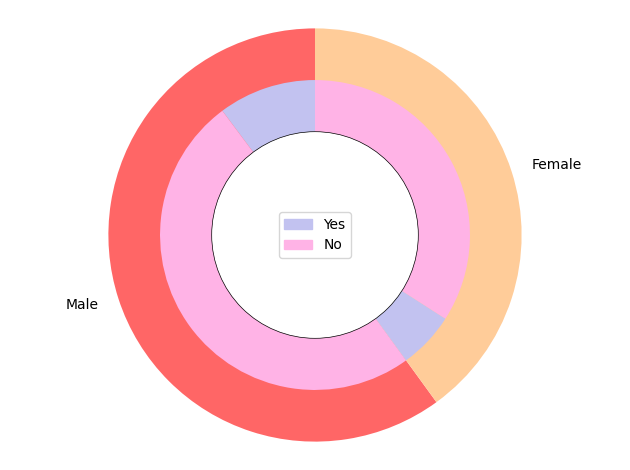

In [ ]:
labels = ['Male', 'Female']
sizes = [882,588]
labels_attrition = ['Yes','No','Yes','No']
sizes_attrition = [150,732,87,501]
colors = ['#ff6666', '#ffcc99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']

# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
ms = data[['MaritalStatus', 'Attrition']]
ms.head()

,MaritalStatus,Attrition
0,Married,No
1,Single,Yes
2,Married,No
3,Married,No
4,Single,No


In [ ]:
ms['MaritalStatus'].value_counts()

MaritalStatus
Married     2019
Single      1410
Divorced     981
Name: count, dtype: int64

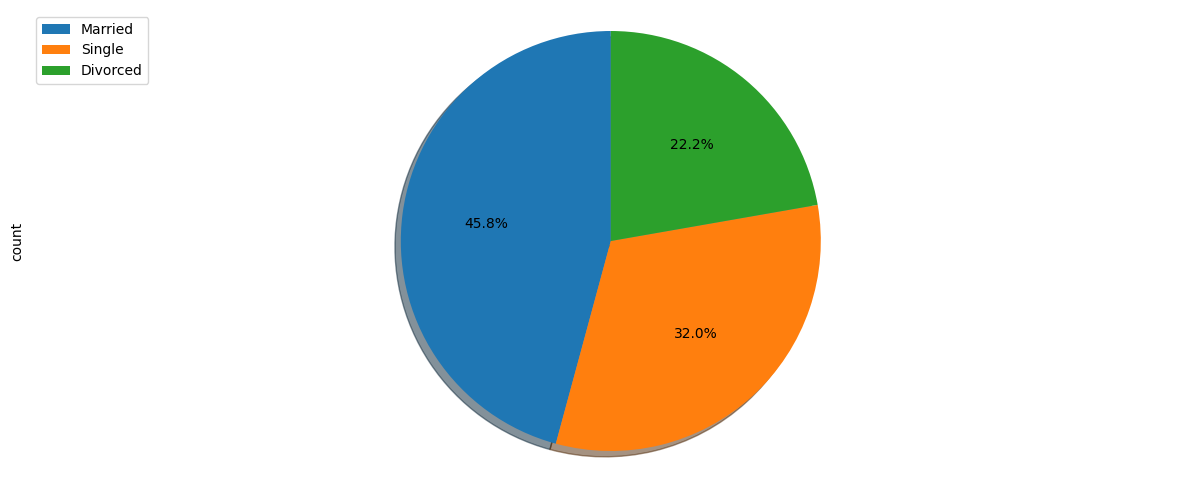

In [ ]:
ms['MaritalStatus'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None)
plt.axis('equal')
plt.legend(labels=['Married', 'Single', 'Divorced'], loc='upper left')

In [ ]:
msa = ms.groupby("MaritalStatus")['Attrition'].value_counts(normalize=False).unstack()
msa = msa.transpose()
msa

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,882,1767,1050
Yes,99,252,360


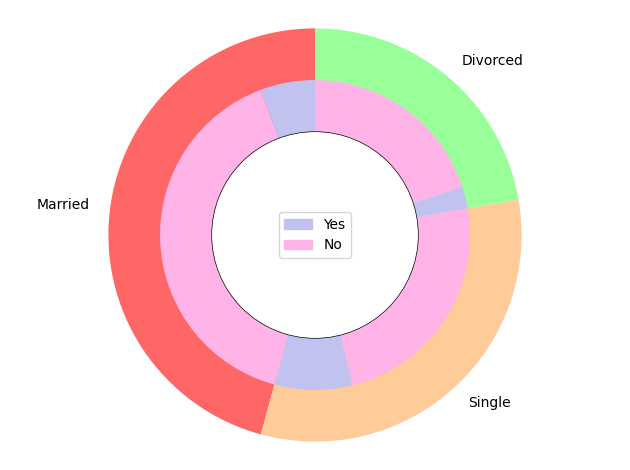

In [ ]:
labels = ['Married', 'Single', 'Divorced']
sizes = [673, 470, 327]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [84,589,120,350,33,294]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']

# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'], dtype='object')

In [ ]:
data.head(2)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,6.0,3,5,1,4,3.0,2.0,4.0,2,4


In [ ]:
le = preprocessing.LabelEncoder()
categorial_variables = ['Attrition','BusinessTravel','Department','EducationField',
                        'Gender','JobRole','MaritalStatus']

In [ ]:
for i in categorial_variables:
    data[i] = le.fit_transform(data[i])
data.head(5)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
target = data['Attrition']
train = data.drop('Attrition',axis = 1)
train.shape

(4410, 24)

In [ ]:
target.head(1)

0    0
Name: Attrition, dtype: int64

In [ ]:
train.head(1)

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,1.0,6,1,0,0,3.0,4.0,2.0,3,3


In [ ]:
train_accuracy = []
test_accuracy = []
models = ['Logistic Regression','SVM','KNN','Decision Tree','K Means Clustering']

In [ ]:
def train_test_error(y_train,y_test):
    train_error = ((y_train==Y_train).sum())/len(y_train)*100
    test_error = ((y_test==Y_test).sum())/len(Y_test)*100
    train_accuracy.append(train_error)
    test_accuracy.append(test_error)
    print('{}'.format(train_error) + " is the train accuracy")
    print('{}'.format(test_error) + " is the test accuracy")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.25, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Separate features and target
target_column = 'Attrition'  # The target column name
X = data.drop(columns=[target_column])
Y = data[target_column]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.25, random_state=42)

# Lists to store accuracies
train_accuracy = []
test_accuracy = []
models = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'K Means Clustering']

# Function to calculate and print train/test accuracies
def train_test_error(y_train, y_test, model_name):
    train_error = accuracy_score(Y_train, y_train) * 100
    test_error = accuracy_score(Y_test, y_test) * 100
    train_accuracy.append(train_error)
    test_accuracy.append(test_error)
    print(f'{model_name} Train Accuracy: {train_error:.2f}%')
    print(f'{model_name} Test Accuracy: {test_error:.2f}%')

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
train_predict = log_reg.predict(X_train)
test_predict = log_reg.predict(X_test)
train_test_error(train_predict, test_predict, 'Logistic Regression')

# SVM
SVM = svm.SVC(probability=True)
SVM.fit(X_train, Y_train)
train_predict = SVM.predict(X_train)
test_predict = SVM.predict(X_test)
train_test_error(train_predict, test_predict, 'SVM')

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)
train_test_error(train_predict, test_predict, 'KNN')

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)
train_predict = decision_tree.predict(X_train)
test_predict = decision_tree.predict(X_test)
train_test_error(train_predict, test_predict, 'Decision Tree')

# K-Means Clustering (Note: This is unsupervised and doesn't use the target variable directly)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_imputed)

# Map the cluster labels to the actual labels for train data
train_clusters = kmeans.predict(X_train)
train_labels = np.zeros_like(train_clusters)
for i in range(2):
    mask = (train_clusters == i)
    train_labels[mask] = mode(Y_train[mask])[0]

# Map the cluster labels to the actual labels for test data
test_clusters = kmeans.predict(X_test)
test_labels = np.zeros_like(test_clusters)
for i in range(2):
    mask = (test_clusters == i)
    test_labels[mask] = mode(Y_test[mask])[0]

# Evaluate K-Means on training and test data
train_test_error(train_labels, test_labels, 'K Means Clustering')

# Display results
results = pd.DataFrame({"Test Accuracy": test_accuracy, "Train Accuracy": train_accuracy}, index=models)
print(results)

Logistic Regression Train Accuracy: 83.58%
Logistic Regression Test Accuracy: 84.77%
SVM Train Accuracy: 83.58%
SVM Test Accuracy: 84.77%
KNN Train Accuracy: 84.37%
KNN Test Accuracy: 83.77%
Decision Tree Train Accuracy: 100.00%
Decision Tree Test Accuracy: 97.55%


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K Means Clustering Train Accuracy: 83.58%
K Means Clustering Test Accuracy: 84.77%
                     Test Accuracy  Train Accuracy
Logistic Regression      84.768812       83.580284
SVM                      84.768812       83.580284
KNN                      83.771532       84.366495
Decision Tree            97.552131      100.000000
K Means Clustering       84.768812       83.580284
